In [3]:
pip install -q notebook==6.5.6

Note: you may need to restart the kernel to use updated packages.


# Problem

_You’re thinking about doing a backpacking trip through Rainier National Park but there’s one big concern; that’s Samsquanch territory! After thinking it over for a moment you realize you have one big advantage; Samsquanch’s broad shoulders make it more difficult to navigate dense trees while your small, nerdy frame can fit quite easily. In order to make sure you have a chance to escape, you want to make sure the forest you’re hiking through has sufficient tree density._

_Let’s model our forest as a 10x10 square. The top will be the entrance and the bottom will be the exit. For simplicity, we will assume the sides are impassable barriers. Each tree will be modeled by a point and Samsquanch will be modeled by a circle of radius 1. Trees will be distributed uniformly in the 10x10 square. Let’s further assume that Samsquanch can’t fit between any two trees that are less than 2R apart. We need to figure out what density the trees need to be in order for you to evade Samsquanch._

_This week, we will do another related but simpler problem (a warmup if you will). Instead of navigating through a 2D forest, Image you just have to determine if Samsquanch can fit through a particular line of trees. The trees are uniformly distributed on a line of length 10. In other words, you need to identify if there are any gaps in this line of length at least 2. Assume there are 7 trees on this line. What is the probability that Samsquanch can fit through this barrier of trees?_

# Solution

So we have a number of trees that exist on this line and we need to figure out the probability that there's a gap between neighboring trees that's greater than length 2. Right off the bat, the 'neighboring' trees description should clue us into the fact that we'll want to use order statistics. Instead of jumping right to this though, let's start a bit simpler. With just one tree, the length of each segment will, of course is a uniform distribution. With two trees, things get a bit more complex. Let $X_1$ and $X_2$ be the location of the trees. The we can descibe the length of the three resulting segments as 

$ 
\begin{align}
L_1 = min(X_1, X_2) \\
L_3 = 1 - max(X_1, X_2) \\
L_2 = |X_2 - X_1|
\end{align}
$

You may already know that $L_1$ and $L_3$ have distributions

$ 
\begin{align}
f_{L_1} = 2 - 2x \text{ where } 0 \leq x \leq 1 \\
f_{L_3} = 2 - 2x \text{ where } 0 \leq x \leq 1
\end{align}
$ 

but let's quick verify.

$ F_{L_1}(l_1) = P (L_1 \leq l_1) = P (min(X_1, X_2) \leq l_1) = P (X_1 \leq l_1 \text{ and } X_2 \leq l_1)  = P (X_1 \leq l_1 ) P(X_2 \leq l_1) = F_{X_1} F_{X_2} $

Now we just need to take a deriviative (product rule)

$ \frac{d}{dL_1} F_{L_1} = \frac{d}{dL_1} F_{X_1} F_{X_2}  = f_{X_2} F_{X_1} + f_{X_1} F_{X_2} = x + x = 2x $

A similar procedure can be used for $L_3$. 

Now for $L_2$.

$ 
\begin{align}
F_{L_2}(t) &= P(|X_1 - X_2| \leq t) \\
&= 1 - P(|X_1 - X_2| > t)
\end{align}
$

Since $X_1$ and $X_2$ are independent and uniformly distributed, their joint is uniformly distribute on the 1x1 square, se we can just calculate the area within the 1x1 square and outside of $X_1 + t$ and $X_1 - t$ (two triangles) to get

$ 
\begin{align}
P(|X_1 - X_2| > x) = 2 \times \left( \frac{(1 - x)^2}{2} \right) = (1 - x)^2 \\
\rightarrow F_{L_2}(x) = 1 - (1 - x)^2 = 2x - x^2 
\end{align}
$

And so the PDF is 

$ f_{L_2}(x) = \frac{d}{dx} F_{L_2}(x) = 2 - 2x $

It makes sense that they're all the same given their symmetry. 

Now we could procede in a similar maner iteratively using $max$, $min$ and taking convolutions but if we reframe the problem, we can more easy get the generalized solution for any n-th order statistic.

If we have a set of random variables $X_1, X_2, \cdots , X_N$ (let's think of them as points on the line $[0,1]$) that have been ordered and originate from a standard uniform distribution. Consider for a moment that if we want to find the distribution of the location of the k-th order statistic (i.e. $X_k$) then there are $k$ points that are less than or equal to $X_k$ and $N-k$ points that are above or equal. This distinction is a binary one and so we can formulate the CDF with the help of the Bernoulli distribution. Recall that the Bernoulli distribution computes the probability that we observe exactly $k$ 'successes' and is formulated as follows

$ F_X = \binom{N}{k} x^k (1-x)^{N-k} $

In our case, we want to cumulative distribution of the $X_k$ order statistic so we need the sum from $1$ to $k$. 

$ F_{X_k} = \sum_{j=0}^k \binom{N}{j} x^j (1-x)^{N-j} $

And there it is! To get the PDF all we need is take the derivative with respect to x. I omit the details here and we get

$ f_{X_{(k)}}(x) = \frac{n!}{(k - 1)! \, (n - k)!} \, x^{k - 1} (1 - x)^{n - k}, \quad \text{for } 0 \leq x \leq 1 $

It should be noted that this also happens to be the Beta distribution, which crops up in a lot of interesting places. 

With the a general form for of the distribution we next need to compute the probabilities

$
\begin{align}
P(X_1 &\geq 2) \\
P(X_2 -X_1 &\geq 2) \\
P(X_3 -X_2 &\geq 2) \\
&\vdots \\
P(X_7 -X_6 &\geq 2) \\
P(1 - X_7 &\geq 2)
\end{align}
$

Here again we can use convolutions however these integrations get a bit unruly so I will instead using the well documented joint distribution (honestly, the spacing distribution for order statistics is also reasonably well documented but let's not take all the fun out if it).

$ f_{X_{(i)}, X_{(j)}}(x, y) = \frac{n!}{(i - 1)! \, (j - i - 1)! \, (n - j)!} \, x^{i - 1} (y - x)^{j - i - 1} (1 - y)^{n - j}, \quad \text{for } 0 \leq x \leq y \leq 1 $

We want the distance $D$ from one order statistic to the next so we can set $j=i+1$ and express the distribution of the distance as follows

$ f_{X_{(i)}, D}(x, d) = f_{X_{(i)}, X_{(i+1)}}(x, x + d) = \frac{n!}{(i - 1)! \, (n - i - 1)!} \, x^{i - 1} (1 - x - d)^{n - i - 1} $ 

Using this, we can find the marginal of $D$ by integrating over $x$. Note the $1-d$ in the upper limit of the integral becuase of the change of variables $y=x+d$. So if we were integrating from $0 \leq x \leq y 1 $ then we get $x+d = y \leq 1 $ implying $ x \leq 1-d$

$ f_{D}(d) = \int_{0}^{1 - d} f_{X_{(i)}, D}(x, d) \, dx = \frac{n!}{(i - 1)! \, (n - i - 1)!} \int_{0}^{1 - d} x^{i - 1} (1 - x - d)^{n - i - 1} \, dx $

Evaluating this with software we get

$ f_D(d) = n(1-d)^{(n-1)}$

We'll notice that this too is a Beta distribution! $ B(1,n)$

Of course, we could have just employed a symmetry argument to establish that each of these different spacings had to have the same distribution, the easiest of which to calculate is the spaceing from 0 to $X_1$ which is obviously just $B(1,n)$.

So if compute

$ P(X_1 \geq 2) = \int_0^{0.2} B(1,n) dx $

And raise to the eighth power, we have our answer...

Except that DOESNT WORK becuase each spacing variable is NOT independent (sigh). I feel a little stupid. I should have realized the approach wasn't valid way before :) 

So how should we do this?

I need some more time to figure this out! Updates will be forthcoming!

# The ACTUAL Solution

After realizing that my approach above wasn't valid and that I was stuck, I did a little research and came accross this gem [here](https://math.stackexchange.com/questions/4740702/distribution-of-the-largest-gap-between-uniform-random-variables) from username Congerro which helped significantly.

It's well know that the distribution of gap distances between consecutive order statistics is modeled by the symmetric [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution) (shown below).

$$
f(x_1, \ldots, x_k; \alpha_1, \ldots, \alpha_k) = \frac{1}{B(\alpha)} \prod_{i=1}^k x_i^{\alpha_i - 1}
$$

where $ x_1, \ldots, x_k $ are the variables, $ \alpha_1, \ldots, \alpha_k $ are the parameters, and $ B(\alpha) $ is the multivariate Beta function defined as:

$$
B(\alpha) = \frac{\prod_{i=1}^k \Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k \alpha_i\right)}
$$

with $ \Gamma $ being the Gamma function.

The Dirichlet distribution's support (the part of the domain that produces non-zero probability) can be modeled by an $(K-1)$-[simplex](https://en.wikipedia.org/wiki/Simplex#The_standard_simplex). What's more, when the Dirichlet is symmatric (i.e. all $\alpha$ 's are the same) and $\alpha=1$, the distribution is uniform over the $(K-1)$-simplex. This is pretty easy to observe by evaluating the distribution. 

$$
f(x_1, \ldots, x_k; 1, \ldots, 1) = \frac{1}{B(1, \ldots, 1)} \prod_{i=1}^k x_i^{1 - 1} = \frac{1}{B(1, \ldots, 1)} \prod_{i=1}^k x_i^0 = \frac{1}{B(1, \ldots, 1)}
$$

Since $ x_i^0 = 1 $ for all $ i $, the product term is 1. Now, we need to evaluate the multivariate Beta function $ B(\alpha) $:

$$
B(1, \ldots, 1) = \frac{\prod_{i=1}^k \Gamma(1)}{\Gamma\left(\sum_{i=1}^k 1\right)} = \frac{\Gamma(1)^k}{\Gamma(k)}
$$

We know that $ \Gamma(1) = 1 $ and $ \Gamma(k) = (k-1)! $, so:

$$
B(1, \ldots, 1) = \frac{1^k}{(k-1)!} = \frac{1}{(k-1)!}
$$

Since we have $n+1$ gaps, the Dirichlet distribution simplifies to:

$$
f(x_1, \ldots, x_{n+1}; 1, \ldots, 1) = n!
$$

Now how do we relate that to our problem at hand, namely finding the probability 

$
P\left( \max_{0 \leq k \leq n} D_k \leq \delta \right)
$

where $D_k$ is the distance between consecutive order statistics. Interpreting the problem geometrically, if we know that our distribution is uniform on the simplex $S$ and each dimension $D_k$ needs to be less than some $\delta$, than the part of the geomtric space that we care about is the part of the simplex that intersection with the n-dimensional hypercube $H=[0,\delta]^n$ 

$ \frac{S \cap H}{S} $

Since we know the simplex must integrate to 1 and it's uniform with value $n!$, the volume must be $\frac{1}{n!}$. As for the intersection, I found it easiest to think about the geometric interpretation. In this case, we have the proportion of the simplex (a hyperplane) that falls within the hypercube. We know this hyperplane is defined by

$ \sum_{k=0}^{n+1} D_k = 1 $

Here again I got some help, this time from [Morengo et al.](https://onlinelibrary.wiley.com/doi/10.1155/2017/3571419), which show that the intersection of the simplex and the hypercube can be modeled by an Irwin-Hall distribution. While this still violates my intuition about the Irwin-Halld distribution, which describes the sum of _uniform_ random variables (while our previous interpretation of the simplex as representing the support of the Direchlet, for which the gaps _not individually uniform_) its nevertheless true. If someone has a good intuition for why this works, please share!

Equipped with this, we can simply transform our standard Irwin-Hall distribution $F_X$.

$ D = \delta \cdot U $

$ F_D(x) = P(D \leq x) = P(\delta U \leq x) = P(U \leq \frac{x}{\delta}) = F_X(\frac{x}{\delta}) $

$ \frac{d}{dx} F_X(\frac{x}{\delta}) = \frac{1}{\delta} f_X(\frac{x}{\delta})  = \frac{1}{\delta} f_D(x)$

Also, since the we are transforming each $n+1$ gap from the expect range of $[0,1]$ to $[0, \delta]$ (effectively a change of variables over $n+1$ variables) we need to multiply by the Jacobian determinant which evaluates to $\delta^{n+1}$

$ f_D(x) = \delta^{n+1} \frac{1}{\delta} \frac{1}{n!} \sum_{k=0}^{\lfloor \frac{x}{\delta} \rfloor} (-1)^k \binom{n+1}{k} (\frac{x}{\delta} - k)^{n}, \quad \text{for } 0 \leq x \leq \delta n $

And we want to evaluate it at $x=1$

$ f_D(1) = \delta^{n+1} \frac{1}{\delta} \sum_{k=0}^{\lfloor \frac{1}{\delta} \rfloor} (-1)^k \binom{n+1}{k} (\frac{1}{\delta} - k)^{n} $

$ S \cap H = f_D(1) = \frac{1}{n!} \sum_{k=0}^{\lfloor \frac{1}{\delta} \rfloor} (-1)^k \binom{n+1}{k} (1 - \delta k)^{n} $

$ \frac{S \cap H}{S} =  P\left( \max_{0 \leq k \leq n} D_k \leq \delta \right) = \sum_{k=0}^{\lfloor \frac{1}{\delta} \rfloor} (-1)^k \binom{n+1}{k} (1 - \delta k)^{n}$

Now let's compute some examples to check this. 

Computing for n=2, delta=0.5
Computing for n=5, delta=0.2
Computing for n=7, delta=0.2


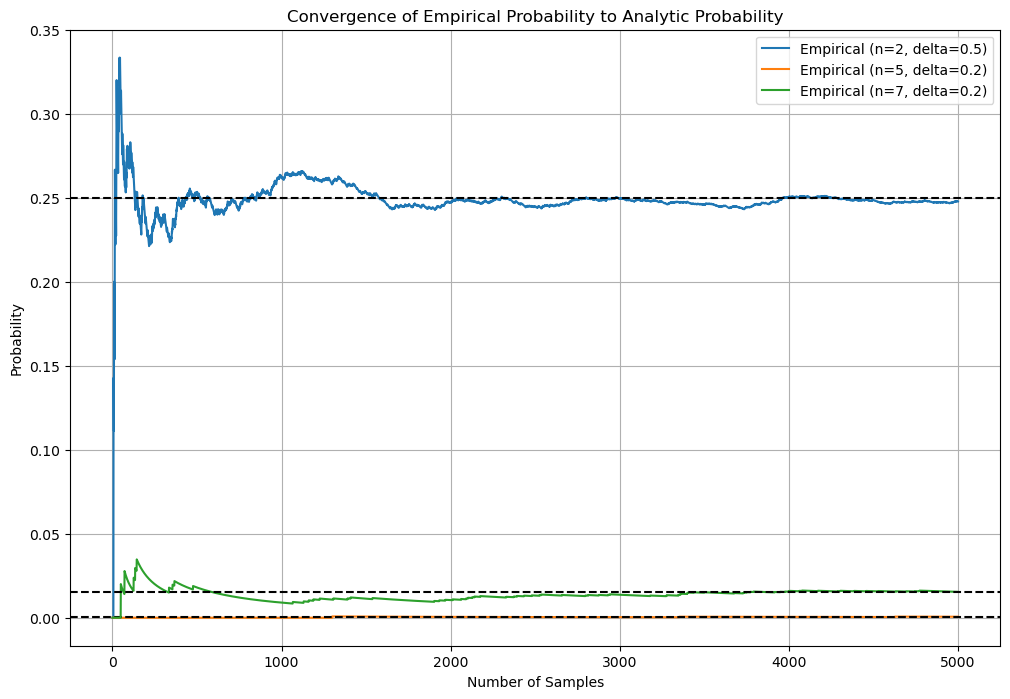

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Custom comb function using factorial
def comb(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

# Function to compute the analytical probability
def analytic_probability(n, delta):
    total_sum = 0
    for k in range(int(1 / delta) + 1):
        term = (-1) ** k * comb(n + 1, k) * (1 - k * delta) ** n
        total_sum += term
    return total_sum

# Function to empirically estimate the probability
def empirical_probability(n, delta, num_samples):
    count = 0
    probabilities = []
    for i in range(1, num_samples + 1):
        # Generate n uniform random variables and sort them
        points = np.sort(np.random.uniform(0, 1, n))
        # Include the endpoints 0 and 1
        points = np.concatenate(([0], points, [1]))
        # Calculate the differences (gaps)
        gaps = np.diff(points)
        # Check if the maximum gap is less than or equal to delta
        if np.max(gaps) <= delta:
            count += 1
        # Store the empirical probability after each sample
        probabilities.append(count / i)
    return probabilities

# Parameters to explore
n_values = [2, 5, 7]  # Different n values
delta_values = [0.5, 0.2, 0.2]  # Different delta values
num_samples = 5000  # Number of samples to run

# Plotting the convergence of empirical results compared to the analytic ones
plt.figure(figsize=(12, 8))

for n, delta in zip(n_values, delta_values):
    print(f'Computing for n={n}, delta={delta}')
    # Compute the analytic probability
    analytic_result = analytic_probability(n, delta)
    # Compute the empirical probability over time
    empirical_results = empirical_probability(n, delta, num_samples)
    # Plot the empirical probabilities over time
    plt.plot(range(1, num_samples + 1), empirical_results, label=f'Empirical (n={n}, delta={delta})')
    # Plot the analytic result as a horizontal line, without duplicate labels
    plt.axhline(y=analytic_result, color='k', linestyle='--')

# Make sure only the empirical probabilities are in the legend
plt.xlabel('Number of Samples')
plt.ylabel('Probability')
plt.title('Convergence of Empirical Probability to Analytic Probability')
plt.legend(loc='best')
plt.grid(True)
plt.show()



Looks like the convergence is there.

So the answer to our questions is 1.52% for 7 trees and a gap of 2.

In [15]:
print(1-analytic_probability(7, .2))

0.9847552000000007
